# Reading and Parsing LAS file using LASIO

Lasio docs: https://lasio.readthedocs.io/en/latest/index.html

In [22]:
import lasio
import lasio.examples

LAS has version, well, curves, parameter and other sections which can be accessed by `las.version`, `las.well`, `las.curves`, `las.param`, and `las.other` objects. Can be seen by running `las.sections.keys()`.

In [23]:
# las = lasio.examples.open("1001178549.las")
las = lasio.read('Data/382605076430201.20020311.ZH.las')
print(las.version)
# or las.sections['Version']

Only engine='normal' can read wrapped files


Mnemonic  Unit  Value  Description                           
--------  ----  -----  -----------                           
VERS            2.0    CWLS LOG ASCII STANDARD -VERSION 2.0  


In [24]:
print(las.curves)
# or las.sections['Curves']

Mnemonic  Unit    Value         Description             
--------  ----    -----         -----------             
DEPT      FT      00 001 00 00  1  DEPTH                
GAM(NAT)  API-GR  00 310 00 00  2             GAM(NAT)  
SP        MV      00 010 00 00  3                   SP  
RES(16N)  OHM-M   00 040 00 00  4             RES(16N)  
RES(64N)  OHM-M   00 060 00 00  5             RES(64N)  
RES       OHM     00 000 00 00  6                  RES  
LATERAL   OHM-M   00 070 00 00  7              LATERAL  


In [25]:
print(las.well)

Mnemonic  Unit  Value             Description      
--------  ----  -----             -----------      
STRT      FT    1.2               START DEPTH      
STOP      FT    1599.2            STOP DEPTH       
STEP      FT    0.1               STEP    UP_HOLE  
NULL            -999.25           NULL VALUE       
COMP            MDGS              COMPANY          
WELL            SMBC39            WELL             
FLD             Persimmon H       FIELD            
LOC             None  None  None  LOCATION         
CNTY            St. Mary's        COUNTY           
STAT            Md.               STATE            
SRVC            None              SERVICE COMPANY  
DATE            03/11/02          LOG DATE         
UWI                               UNIQUE WELL ID   
LIC                               LICENSE NUMBER   


In [26]:
print(las.params)

Mnemonic  Unit  Value       Description               
--------  ----  -----       -----------               
FILE            ORIGINAL    File Type                 
FIID            8044A       File Type Identifier      
VERS            1.0         System Version            
SER             1           System Serial Number      
TRUK            0.0         Truck Calibration Number  
TOOL            904         Tool Serial Number        
TIME            1205        Time    HrHrMinMin        
LAT             None        Latitude                  
LON             None        Longitude                 
LMF             Grnd. L     Log Measured From         
DMF             Grnd. L     Driller Measured From     
PD              None        Permanent Data            
PDEV            None        Elevation Permanent Data  
EKB       M     None        Elevation Kelly Bushing   
ELEV      DF    None        Elevation DF              
EGL       M     None        Elevation Ground Level    
DRDP      

The data is present as a `numpy.ndarray`.

In [27]:
las.data

array([[1.20000e+00,         nan,         nan, ...,         nan,
                nan, 2.50054e+04],
       [1.30000e+00,         nan, 3.26000e+01, ...,         nan,
                nan, 2.50054e+04],
       [1.40000e+00,         nan, 3.29000e+01, ...,         nan,
                nan, 2.50054e+04],
       ...,
       [1.59900e+03,         nan,         nan, ...,         nan,
                nan,         nan],
       [1.59910e+03,         nan,         nan, ...,         nan,
                nan,         nan],
       [1.59920e+03,         nan,         nan, ...,         nan,
                nan,         nan]])

Or the data can be shown by iterating over the curves.

In [29]:
for curve in las.curves:
    print(f"Curve: {curve.mnemonic}, Units: {curve.unit}, Data: {curve.data}")

Curve: DEPT, Units: FT, Data: [1.2000e+00 1.3000e+00 1.4000e+00 ... 1.5990e+03 1.5991e+03 1.5992e+03]
Curve: GAM(NAT), Units: API-GR, Data: [nan nan nan ... nan nan nan]
Curve: SP, Units: MV, Data: [ nan 32.6 32.9 ...  nan  nan  nan]
Curve: RES(16N), Units: OHM-M, Data: [nan nan nan ... nan nan nan]
Curve: RES(64N), Units: OHM-M, Data: [nan nan nan ... nan nan nan]
Curve: RES, Units: OHM, Data: [nan nan nan ... nan nan nan]
Curve: LATERAL, Units: OHM-M, Data: [25005.4 25005.4 25005.4 ...     nan     nan     nan]


Modifying value can be performed by `las.SECTION['MNEMONIC']`<br>
And other items by `las.HeaderItem.Mnemonic.AttributeName = VALUE`

In [ ]:
# las.well['COMP'] = 'Imperial Oil'
print(las.well)

Deleting a curve can be performed by `las.delete_curve('MNEMONIC')`.<br>
For other items, use `del las.SectionItem["ITEM"]` like removing an item from dictionary.

In [ ]:
# las.delete_curve('DLTN')

To save, use `las.write('PATH/FILENAME.las')`.
Can be exported to other formats such as CSV or XLSX. `las.to_excel('PATH/FILENAME.xlsx')`

In [ ]:
las.write('Exports/test.las')

LAS data can be converted to Pandas dataframe. The first curve or the depth will be used for the dataframe's index. (Pandas must be installed)<br>
This enables us to plot data and pass the data to machine learning algorithms.

In [30]:
df = las.df()
print(df)

        GAM(NAT)    SP  RES(16N)  RES(64N)  RES  LATERAL
DEPT                                                    
1.2          NaN   NaN       NaN       NaN  NaN  25005.4
1.3          NaN  32.6       NaN       NaN  NaN  25005.4
1.4          NaN  32.9       NaN       NaN  NaN  25005.4
1.5          NaN  33.0       NaN       NaN  NaN  25005.4
1.6          NaN  33.2       NaN       NaN  NaN  25005.4
...          ...   ...       ...       ...  ...      ...
1598.8       NaN   NaN       NaN       NaN  NaN      NaN
1598.9       NaN   NaN       NaN       NaN  NaN      NaN
1599.0       NaN   NaN       NaN       NaN  NaN      NaN
1599.1       NaN   NaN       NaN       NaN  NaN      NaN
1599.2       NaN   NaN       NaN       NaN  NaN      NaN

[15981 rows x 6 columns]


In [31]:
df.head()

,GAM(NAT),SP,RES(16N),RES(64N),RES,LATERAL
DEPT,,,,,,
1.2,NaN,NaN,NaN,NaN,NaN,25005.4
1.3,NaN,32.6,NaN,NaN,NaN,25005.4
1.4,NaN,32.9,NaN,NaN,NaN,25005.4
1.5,NaN,33.0,NaN,NaN,NaN,25005.4
1.6,NaN,33.2,NaN,NaN,NaN,25005.4


In [32]:
df.describe()

,GAM(NAT),SP,RES(16N),RES(64N),RES,LATERAL
count,15919.000000,15909.000000,15909.000000,15909.000000,15909.000000,15910.000000
mean,57.938752,45.497605,30.469816,45.016701,24.855447,25025.823268
std,16.534755,49.186084,24.669817,59.810041,7.094554,18.657828
min,11.600000,-101.600000,4.100000,3.700000,13.000000,25000.900000
25%,48.100000,30.500000,10.900000,13.200000,19.000000,25009.900000
50%,58.300000,53.200000,21.800000,24.800000,24.000000,25020.300000
75%,68.000000,79.600000,42.100000,52.800000,29.900000,25037.675000
max,147.100000,197.200000,147.100000,572.000000,50.700000,25131.600000


`df.info()` shows how many null values are present.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15981 entries, 1.2 to 1599.2
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GAM(NAT)  15919 non-null  float64
 1   SP        15909 non-null  float64
 2   RES(16N)  15909 non-null  float64
 3   RES(64N)  15909 non-null  float64
 4   RES       15909 non-null  float64
 5   LATERAL   15910 non-null  float64
dtypes: float64(6)
memory usage: 874.0 KB


All curves can be plotted on a single plot using Pandas plot funtion `df.plot()` (not useful).<br>
It is more useful to plot single curves.


<Axes: xlabel='DEPT'>

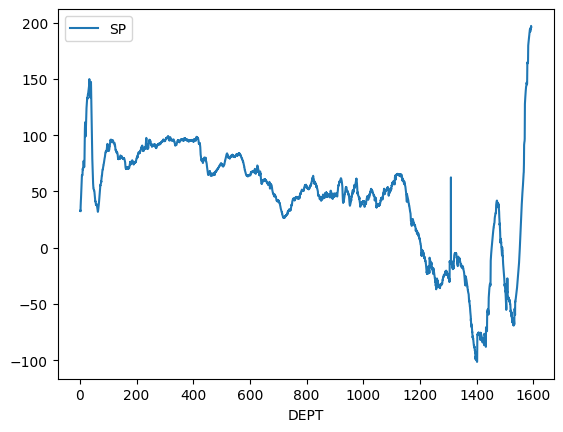

In [34]:
df.plot(y='SP')